<a href="https://colab.research.google.com/github/aaron-v19/practice/blob/main/irisclassifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [77]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision

### Create Model class

In [78]:
class Model(nn.Module):

    def __init__(self,features=4,h1=8,h2=8,out=3):
        super().__init__()   # instantiate or nn.module
        self.fc1=nn.Linear(features,h1)
        self.fc2=nn.Linear(h1,h2)
        self.fc3=nn.Linear(h2,out)

    def forward(self,x):
      x=F.relu(self.fc1(x))
      x=F.relu(self.fc2(x))
      x=self.fc3(x)
      return x

In [79]:
#pick a manual seed for randomation
torch.manual_seed(19)
# create a instance of model
model=Model()

In [80]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
%matplotlib inline

In [81]:
url='https://gist.githubusercontent.com/netj/8836201/raw/6f9306ad21398ea43cba4f7d537619d0e07d5ae3/iris.csv'
df=pd.read_csv(url)

In [82]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,Setosa
1,4.9,3.0,1.4,0.2,Setosa
2,4.7,3.2,1.3,0.2,Setosa
3,4.6,3.1,1.5,0.2,Setosa
4,5.0,3.6,1.4,0.2,Setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Virginica
146,6.3,2.5,5.0,1.9,Virginica
147,6.5,3.0,5.2,2.0,Virginica
148,6.2,3.4,5.4,2.3,Virginica


In [83]:
#change last column to integer
df['variety']=df['variety'].replace('Setosa',0.0)
df['variety']=df['variety'].replace('Versicolor',1.0)
df['variety']=df['variety'].replace('Virginica',2.0)

In [84]:
df

,sepal.length,sepal.width,petal.length,petal.width,variety
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2.0
146,6.3,2.5,5.0,1.9,2.0
147,6.5,3.0,5.2,2.0,2.0
148,6.2,3.4,5.4,2.3,2.0


In [85]:
X=df.drop('variety',axis=1)
y=df['variety']

In [86]:
X=X.values
y=y.values

In [87]:
X

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [88]:
from sklearn.model_selection import train_test_split

In [89]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=41)

In [90]:
#Convert x features to float tensors
X_train=torch.FloatTensor(X_train)
X_test=torch.FloatTensor(X_test)

In [91]:
y_train=torch.LongTensor(y_train)
y_test=torch.LongTensor(y_test)

In [92]:
#Set performance measure
criterion=nn.CrossEntropyLoss()
#choose optimizer
#set Learning rate
optimizer=torch.optim.Adam(model.parameters(),lr=0.01)



In [93]:
model.parameters

<bound method Module.parameters of Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)>

In [94]:
#Train our model
epochs=100
losses=[]   # to keep tab of loss data
for i in range(epochs):
  #go forward
  y_pred=model.forward(X_train) #get prediction res

  #measure the loss error
  loss=criterion(y_pred,y_train)

  #keep track of our losses
  losses.append(loss.detach().numpy())

  #print loss every 10 epoch
  if i%10==0:
    print(f'Epoch : {i} and loss : {loss}')

  #backprop
  optimizer.zero_grad()
  loss.backward()

  #update weights
  optimizer.step()


Epoch : 0 and loss : 1.1405500173568726
Epoch : 10 and loss : 0.9377087950706482
Epoch : 20 and loss : 0.6663758754730225
Epoch : 30 and loss : 0.46210744976997375
Epoch : 40 and loss : 0.3655044436454773
Epoch : 50 and loss : 0.2878369092941284
Epoch : 60 and loss : 0.2093513458967209
Epoch : 70 and loss : 0.142872154712677
Epoch : 80 and loss : 0.09906986355781555
Epoch : 90 and loss : 0.07403485476970673


Text(0.5, 0, 'Epoch')

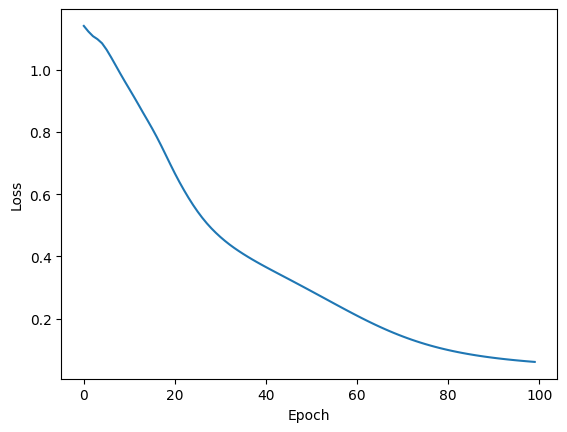

In [95]:
#graph it out
plt.plot(range(epochs),losses)
plt.ylabel('Loss')
plt.xlabel('Epoch')

### Evaluate the model

In [97]:
with torch.no_grad():    #basically to turn off back propogation as it is not needed now that model is built
  y_eval=model.forward(X_test)
  loss=criterion(y_eval,y_test)

In [98]:
loss

tensor(0.1302)

In [107]:
correct =0
with torch.no_grad():
  for i,data in enumerate(X_test):
    y_val=model.forward(data)
    print(f'prediction : {y_val}        { y_val.argmax().item()}         {y_test[i]}')
    if y_val.argmax().item()==y_test[i]:
      correct+=1
print(f'we got {correct} corect')

prediction : tensor([-6.1319,  2.1532,  4.4284])        2         2
prediction : tensor([-8.3338,  1.6931,  7.1573])        2         2
prediction : tensor([-8.6194,  2.1680,  7.0444])        2         2
prediction : tensor([-3.0265,  3.2206,  0.2144])        1         1
prediction : tensor([-7.2180,  2.2041,  5.5318])        2         2
prediction : tensor([-1.3188,  3.6510, -1.9662])        1         1
prediction : tensor([-5.5852,  2.4403,  3.6000])        2         2
prediction : tensor([-2.7802,  3.2651, -0.0848])        1         1
prediction : tensor([-6.3476,  2.3319,  4.5004])        2         2
prediction : tensor([-8.6834,  1.8026,  7.4313])        2         2
prediction : tensor([-5.2518,  2.5082,  3.1883])        2         2
prediction : tensor([  7.6872,   2.4073, -12.4550])        0         0
prediction : tensor([  6.8382,   2.2015, -11.1453])        0         0
prediction : tensor([-0.3822,  3.2786, -2.7033])        1         1
prediction : tensor([  7.3231,   2.5401, -

In [99]:
# prompt: confusion matrix

from sklearn.metrics import confusion_matrix

# Convert the model output to class predictions
y_pred = torch.max(y_eval, 1)[1]

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Print the confusion matrix
print(cm)


[[ 9  0  0]
 [ 0 10  1]
 [ 0  1  9]]


In [105]:
new_iris=torch.tensor([5.9	,3.0,	5.1,	1.8])

In [106]:
with torch.no_grad():
  print(model.forward(new_iris))

tensor([-6.0587,  2.2113,  4.3005])


### Save And Load

In [108]:
torch.save(model.state_dict(),'irisclassifier.pt')

In [110]:
new_model=Model()
new_model.load_state_dict(torch.load('irisclassifier.pt'))

<All keys matched successfully>

In [111]:
new_model.eval()

Model(
  (fc1): Linear(in_features=4, out_features=8, bias=True)
  (fc2): Linear(in_features=8, out_features=8, bias=True)
  (fc3): Linear(in_features=8, out_features=3, bias=True)
)